#       بِسمِ اللہِ الرَّحمٰنِ الرَّحِيم  .    شُروع اَللہ کے پاک نام سے جو بڑا مہر بان نہايت رحم والا ہے     


# Import Libraries

In [1]:
import re
import string
import scipy
import pickle
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import  LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from astropy.table import Table,Column 
from prettytable import PrettyTable
import warnings


from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)




# Read and Understand Train and Test Data

In [2]:
df = pd.read_csv (r'C:\Users\Muhammad Umair Ali\Desktop\Assignment ML\train.csv')

df.columns.name = 'index'

print (df)


index    height  weight    hair beard scarf  gender
0      180.3000     196    Bald   Yes    No    Male
1      170.0000     120    Long    No    No  Female
2      178.5000     200   Short    No    No    Male
3      163.4000     110  Medium    No   Yes  Female
4      175.2222     220   Short   Yes    No    Male
5      165.0000     150  Medium    No   Yes  Female


In [3]:
print('\n')
print('\n Train Dataset Columns \n ')
print (df.columns)

print('\n Number of Instances in Dataset  ')

print(len(df.index))






 Train Dataset Columns 
 
Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object', name='index')

 Number of Instances in Dataset  
6


In [4]:
print ('Test DataSet:\n')
dftest = pd.read_csv (r'C:\Users\Muhammad Umair Ali\Desktop\Assignment ML\Test.csv')
print (dftest)
dftest.columns.name = 'index'
print('\n')
print('\n Test Dataset Columns \n ')
print (dftest.columns)

print('\n Number of Instances in Test Dataset  ')

print(len(dftest.index))

Test DataSet:

   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female



 Test Dataset Columns 
 
Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object', name='index')

 Number of Instances in Test Dataset  
4


In [5]:

dframe=pd.DataFrame(df)
print(len(dframe[dframe['gender'] == 'Male']),"Train instances label 'Male'")   
print (dframe[dframe['gender'] == 'Male'])



3 Train instances label 'Male'
index    height  weight   hair beard scarf gender
0      180.3000     196   Bald   Yes    No   Male
2      178.5000     200  Short    No    No   Male
4      175.2222     220  Short   Yes    No   Male


In [6]:
print(len(dframe[dframe['gender'] == 'Female']),"Train instances label 'Female'")   
print (dframe[dframe['gender'] == 'Female'])

3 Train instances label 'Female'
index  height  weight    hair beard scarf  gender
1       170.0     120    Long    No    No  Female
3       163.4     110  Medium    No   Yes  Female
5       165.0     150  Medium    No   Yes  Female


In [7]:
dframe2=pd.DataFrame(dftest)
print(len(dframe2[dframe2['gender'] == 'Male']),"Test instances label 'Male'")   
print (dframe2[dframe2['gender'] == 'Male'])



2 Test instances label 'Male'
index  height  weight  hair beard scarf gender
0       179.1     185  Long   Yes    No   Male
2       177.8     160  Bald    No    No   Male


In [8]:
print(len(dframe2[dframe2['gender'] == 'Female']),"Test instances label 'Female'")   
print (dframe2[dframe2['gender'] == 'Female'])



2 Test instances label 'Female'
index  height  weight    hair beard scarf  gender
1       160.5     130   Short    No    No  Female
3       161.1     100  Medium    No    No  Female


Total Number of 'Male' and 'Female' in Train Data  


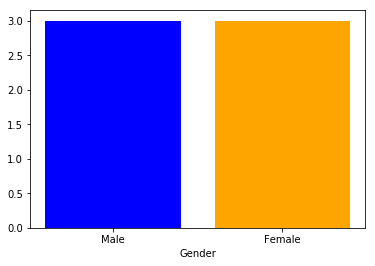

In [10]:
import matplotlib.pyplot as plt 

print("Total Number of 'Male' and 'Female' in Train Data  ")
sizefe=len(dframe[dframe['gender'] == 'Female'])
sizem=len(dframe[dframe['gender'] == 'Male'])

height=[sizem,sizefe]

bars = ('Male', 'Female')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,color=('blue','orange'))
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('Gender')
# Show graphic
plt.show()



Total Number of 'Male' and 'Female' in Test Data  


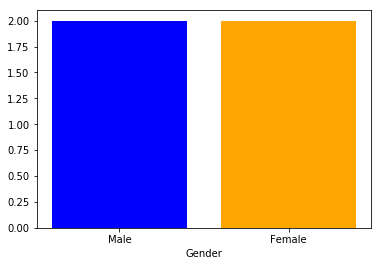

In [11]:

print("Total Number of 'Male' and 'Female' in Test Data  ")
sizefe2=len(dframe2[dframe2['gender'] == 'Female'])
sizem2=len(dframe2[dframe2['gender'] == 'Male'])

height=[sizem2,sizefe2]

bars = ('Male', 'Female')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,color=('blue','orange'))
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('Gender')
# Show graphic
plt.show()



Number of People having various Hair Length in Train DataSet  


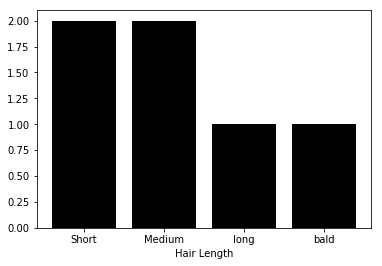

In [12]:
print("Number of People having various Hair Length in Train DataSet  ")
short=len(dframe[dframe['hair'] == 'Short'])
medium=len(dframe[dframe['hair'] == 'Medium'])
long=len(dframe[dframe['hair'] == 'Long'])
bald=len(dframe[dframe['hair'] == 'Bald'])


height=[short,medium,long,bald]

bars = ('Short', 'Medium','long','bald')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,color=('black','black','black','black'))
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('Hair Length')
# Show graphic
plt.show()


Number of People having various Hair Length in Test DataSet  


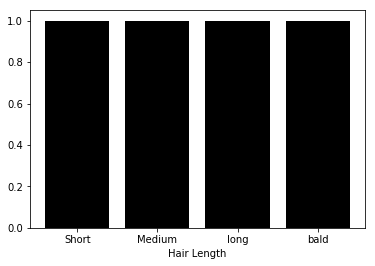

In [13]:
print("Number of People having various Hair Length in Test DataSet  ")
short=len(dframe2[dframe2['hair'] == 'Short'])
medium=len(dframe2[dframe2['hair'] == 'Medium'])
long=len(dframe2[dframe2['hair'] == 'Long'])
bald=len(dframe2[dframe2['hair'] == 'Bald'])


height=[short,medium,long,bald]

bars = ('Short', 'Medium','long','bald')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,color=('black','black','black','black'))
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('Hair Length')
# Show graphic
plt.show()

Number of People have/have not Beard in Train Datatset  


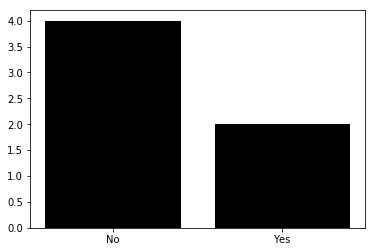

In [14]:
print("Number of People have/have not Beard in Train Datatset  ")
beard=len(dframe[dframe['beard'] == 'No'])
nobeard=len(dframe[dframe['beard'] == 'Yes'])



height=[beard,nobeard]

bars = ('No', 'Yes')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,color=('black','black'))
 
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

Number of People have/have not Beard in Train Datatset  


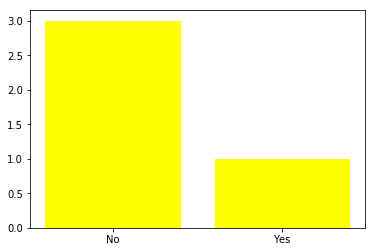

In [15]:
print("Number of People have/have not Beard in Train Datatset  ")
beard=len(dframe2[dframe2['beard'] == 'No'])
nobeard=len(dframe2[dframe2['beard'] == 'Yes'])



height=[beard,nobeard]

bars = ('No', 'Yes')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,color=('yellow','yellow'))
 
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

# Pre-Process Data

In [16]:
df = pd.read_csv (r'C:\Users\Muhammad Umair Ali\Desktop\Assignment ML\train.csv')
dframe=pd.DataFrame(df)
dframeencode=pd.DataFrame(df)
print("Train Dataset before preprocessing")
print(dframe)
dframe.height=np.round(dframe.height, decimals=2)
print("Train Dataset After preprocessing")
print(dframe)
dframetrain=dframe

Train Dataset before preprocessing
     height  weight    hair beard scarf  gender
0  180.3000     196    Bald   Yes    No    Male
1  170.0000     120    Long    No    No  Female
2  178.5000     200   Short    No    No    Male
3  163.4000     110  Medium    No   Yes  Female
4  175.2222     220   Short   Yes    No    Male
5  165.0000     150  Medium    No   Yes  Female
Train Dataset After preprocessing
   height  weight    hair beard scarf  gender
0  180.30     196    Bald   Yes    No    Male
1  170.00     120    Long    No    No  Female
2  178.50     200   Short    No    No    Male
3  163.40     110  Medium    No   Yes  Female
4  175.22     220   Short   Yes    No    Male
5  165.00     150  Medium    No   Yes  Female


# Label Encoding For Train/Test Data

In [17]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
dframe["encoded_gender"] = encode.fit_transform(dframe["gender"])
print("Gender Attribute Encoding in Train Dataset\n")
print(dframe[["gender", "encoded_gender"]].head(11))


Gender Attribute Encoding in Train Dataset

   gender  encoded_gender
0    Male               1
1  Female               0
2    Male               1
3  Female               0
4    Male               1
5  Female               0


In [18]:
encode2 = LabelEncoder()
dframe["encoded_scarf"] = encode2.fit_transform(dframe["scarf"])
print("Scarf Attribute Encoding in Train Dataset\n")
print(dframe[["scarf", "encoded_scarf"]].head(11))


Scarf Attribute Encoding in Train Dataset

  scarf  encoded_scarf
0    No              0
1    No              0
2    No              0
3   Yes              1
4    No              0
5   Yes              1


In [19]:
encode3 = LabelEncoder()
dframe["encoded_beard"] = encode3.fit_transform(dframe["beard"])
print("Beard Attribute Encoding in Train Dataset\n")
print(dframe[["beard", "encoded_beard"]].head(11))


Beard Attribute Encoding in Train Dataset

  beard  encoded_beard
0   Yes              1
1    No              0
2    No              0
3    No              0
4   Yes              1
5    No              0


In [20]:
encode4 = LabelEncoder()
dframe["encoded_hair"] = encode4.fit_transform(dframe["hair"])
print("Hair Attribute Encoding in Train Dataset\n")
print(dframe[["hair", "encoded_hair"]].head(11))


Hair Attribute Encoding in Train Dataset

     hair  encoded_hair
0    Bald             0
1    Long             1
2   Short             3
3  Medium             2
4   Short             3
5  Medium             2


In [21]:
dcode=pd.DataFrame(df)
print("Original Data")
print(dframe[["height","weight","hair","beard","scarf","gender"]])
print("Train data after Label Encoding\n")
dframe["hair"]=dframe["encoded_hair"];
dframe["beard"]=dframe["encoded_beard"];
dframe["scarf"]=dframe["encoded_scarf"];
dframe["gender"]=dframe["encoded_gender"];

print(dframe[["height","weight","hair","beard","scarf","gender"]])


Original Data
   height  weight    hair beard scarf  gender
0  180.30     196    Bald   Yes    No    Male
1  170.00     120    Long    No    No  Female
2  178.50     200   Short    No    No    Male
3  163.40     110  Medium    No   Yes  Female
4  175.22     220   Short   Yes    No    Male
5  165.00     150  Medium    No   Yes  Female
Train data after Label Encoding

   height  weight  hair  beard  scarf  gender
0  180.30     196     0      1      0       1
1  170.00     120     1      0      0       0
2  178.50     200     3      0      0       1
3  163.40     110     2      0      1       0
4  175.22     220     3      1      0       1
5  165.00     150     2      0      1       0


In [22]:
encodet1= LabelEncoder()
encodet2= LabelEncoder()
encodet3= LabelEncoder()
encodet4= LabelEncoder()

dframe2["encoded_gender"] = encodet1.fit_transform(dframe2["gender"])
dframe2["encoded_scarf"] = encodet2.fit_transform(dframe2["scarf"])
dframe2["encoded_hair"] = encodet3.fit_transform(dframe2["hair"])
dframe2["encoded_beard"] = encodet4.fit_transform(dframe2["beard"])
print("Original Data")

print(dframe2[["height","weight","hair","beard","scarf","gender"]])

print("Test data after Label Encoding\n")
dframe2["hair"]=dframe2["encoded_hair"];
dframe2["beard"]=dframe2["encoded_beard"];
dframe2["scarf"]=dframe2["encoded_scarf"];
dframe2["gender"]=dframe2["encoded_gender"];

print(dframe2[["height","weight","hair","beard","scarf","gender"]])


Original Data
index  height  weight    hair beard scarf  gender
0       179.1     185    Long   Yes    No    Male
1       160.5     130   Short    No    No  Female
2       177.8     160    Bald    No    No    Male
3       161.1     100  Medium    No    No  Female
Test data after Label Encoding

index  height  weight  hair  beard  scarf  gender
0       179.1     185     1      1      0       1
1       160.5     130     3      0      0       0
2       177.8     160     0      0      0       1
3       161.1     100     2      0      0       0


# Train ML Algorithms using Train Data

In [23]:
from sklearn import datasets, linear_model, metrics
# create Logistic Regression object 
reg = linear_model.LogisticRegression(solver='lbfgs') 
   
# train the model using the training sets 
reg.fit(dframe[["height","weight","hair","beard","scarf"]],dframe[["gender"]]) 
  
# making predictions on the testing set 
y_pred = reg.predict(dframe2[["height","weight","hair","beard","scarf"]]) 
   
# comparing actual response values (y_test) with predicted response values (y_pred) 
print(reg)
print("Logistic Regression  model accuracy:",  
accuracy_score(dframe2[["gender"]], y_pred )) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Logistic Regression  model accuracy: 0.75


In [25]:
from sklearn.ensemble import RandomForestClassifier
# create Random forest object 
random = RandomForestClassifier()
   
# train the model using the training sets 
random.fit(dframe[["height","weight","hair","beard","scarf"]],dframe[["gender"]]) 
  
# making predictions on the testing set 
y_predrandom = random.predict(dframe2[["height","weight","hair","beard","scarf"]]) 
   
# comparing actual response values (y_test) with predicted response values (y_pred) 
print(random)
print("Random Forest  model accuracy:",  
accuracy_score(dframe2[["gender"]], y_predrandom )) 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Random Forest  model accuracy: 1.0


In [26]:
from sklearn.svm import LinearSVC
# create LinearSV object 
LSV = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0) 
   
# train the model using the training sets 
LSV.fit(dframe[["height","weight","hair","beard","scarf"]],dframe[["gender"]]) 
  
# making predictions on the testing set 
LSV_pred = LSV.predict(dframe2[["height","weight","hair","beard","scarf"]]) 
   
# comparing actual response values (y_test) with predicted response values (y_pred) 
print(LSV)
print("LinearSV model accuracy:",  
accuracy_score(dframe2[["gender"]], LSV_pred )) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
LinearSV model accuracy: 0.75


In [27]:
from sklearn.naive_bayes import BernoulliNB
# create BernoulliNB object 
Ber =BernoulliNB() 
   
# train the model using the training sets 
Ber.fit(dframe[["height","weight","hair","beard","scarf"]],dframe[["gender"]]) 
  
# making predictions on the testing set 
Ber_pred = Ber.predict(dframe2[["height","weight","hair","beard","scarf"]]) 
   
# comparing actual response values (y_test) with predicted response values (y_pred) 
print(Ber)
print("BernoulliNB model accuracy:",  
accuracy_score(dframe2[["gender"]], Ber_pred )) 

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
BernoulliNB model accuracy: 1.0


In [28]:
print("Show Decoded values of Gender for all Modals")
decodeg=encodet1.inverse_transform(y_pred)
print(decodeg)

decodeg2=encodet1.inverse_transform(y_predrandom)
print(decodeg2)

decodeg3=encodet1.inverse_transform(LSV_pred)
print(decodeg3)

decodeg4=encodet1.inverse_transform(Ber_pred)
print(decodeg4)


Show Decoded values of Gender for all Modals
['Male' 'Female' 'Female' 'Female']
['Male' 'Female' 'Male' 'Female']
['Male' 'Female' 'Female' 'Female']
['Male' 'Female' 'Male' 'Female']


In [29]:
dframe.pop('encoded_gender')
dframe.pop('encoded_scarf')
dframe.pop('encoded_beard')
dframe.pop('encoded_hair')

dframe2.pop('encoded_gender')
dframe2.pop('encoded_scarf')
dframe2.pop('encoded_beard')
dframe2.pop('encoded_hair')
...


Ellipsis

In [30]:
dframe2encode=pd.DataFrame(dframe2)

dftest = pd.read_csv (r'C:\Users\Muhammad Umair Ali\Desktop\Assignment ML\Test.csv')
dframe2=pd.DataFrame(dftest)


# Evaluate ML Algorithms using Test Data

In [31]:
dframe2['predicted_gender']=decodeg
log_dframe2=pd.DataFrame(dframe2)

print("Prediction using Logistic Regression\n")
print(log_dframe2)
print("Accuracy Score:\n",  
accuracy_score(dframe2encode[["gender"]], y_pred ))


Prediction using Logistic Regression

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male           Female
3   161.1     100  Medium    No    No  Female           Female
Accuracy Score:
 0.75


In [32]:
dframe2['predicted_gender']=decodeg2
Ran_dframe2=pd.DataFrame(dframe2)

print("Prediction using RandomForestClassifier\n")
print(Ran_dframe2)
print("Accuracy Score:\n",  
accuracy_score(dframe2encode[["gender"]], y_predrandom ))

Prediction using RandomForestClassifier

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male             Male
3   161.1     100  Medium    No    No  Female           Female
Accuracy Score:
 1.0


In [33]:
dframe2['predicted_gender']=decodeg3
LSV_dframe2=pd.DataFrame(dframe2)

print("Prediction using LinearSV\n")
print(LSV_dframe2)
print("Accuracy Score:\n",  
accuracy_score(dframe2encode[["gender"]], LSV_pred ))

Prediction using LinearSV

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male           Female
3   161.1     100  Medium    No    No  Female           Female
Accuracy Score:
 0.75


In [34]:
dframe2['predicted_gender']=decodeg4
Ber_dframe2=pd.DataFrame(dframe2)

print("Prediction using BernoulliNB \n")
print(Ber_dframe2)


print("Accuracy Score:\n",  
accuracy_score(dframe2encode[["gender"]], Ber_pred ))


Prediction using BernoulliNB 

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male             Male
3   161.1     100  Medium    No    No  Female           Female
Accuracy Score:
 1.0


# Selection of Best Modal

In [35]:
x = PrettyTable()

x.field_names = ["Modal", "Accuracy"]
x.add_row(["Logistic Regression",accuracy_score(dframe2encode[["gender"]], y_pred )])
x.add_row(["RandomForestClassifier",accuracy_score(dframe2encode[["gender"]], y_predrandom )])
x.add_row(["LinearSVC",accuracy_score(dframe2encode[["gender"]], LSV_pred )])
x.add_row(["BernoulliNB",accuracy_score(dframe2encode[["gender"]], Ber_pred )])

print("Detailed Performance of all modals")
print(x)
a=accuracy_score(dframe2encode[["gender"]], y_pred )
b=accuracy_score(dframe2encode[["gender"]], y_predrandom )
c=accuracy_score(dframe2encode[["gender"]], LSV_pred )
d=accuracy_score(dframe2encode[["gender"]], Ber_pred )

max(a,b,c,d)

y = PrettyTable()

y.field_names = ["Modal", "Accuracy"]

y.add_row(["RandomForestClassifier",accuracy_score(dframe2encode[["gender"]], y_predrandom )])


print("Best Modal")
print(y)




Detailed Performance of all modals
+------------------------+----------+
|         Modal          | Accuracy |
+------------------------+----------+
|  Logistic Regression   |   0.75   |
| RandomForestClassifier |   1.0    |
|       LinearSVC        |   0.75   |
|      BernoulliNB       |   1.0    |
+------------------------+----------+
Best Modal
+------------------------+----------+
|         Modal          | Accuracy |
+------------------------+----------+
| RandomForestClassifier |   1.0    |
+------------------------+----------+


# Application Layer

# Combine Data(Train+Test)

In [36]:
print('Train Features in the form of DataFrame:\n')
dframe['weight'] = dframe['weight'].astype(float)
dframe['hair'] = dframe['hair'].astype(float)
dframe['beard'] = dframe['beard'].astype(float)
dframe['scarf'] = dframe['scarf'].astype(float)
print(dframe)

Train Features in the form of DataFrame:

   height  weight  hair  beard  scarf  gender
0  180.30   196.0   0.0    1.0    0.0       1
1  170.00   120.0   1.0    0.0    0.0       0
2  178.50   200.0   3.0    0.0    0.0       1
3  163.40   110.0   2.0    0.0    1.0       0
4  175.22   220.0   3.0    1.0    0.0       1
5  165.00   150.0   2.0    0.0    1.0       0


In [37]:

print('Test Features in the form of DataFrame:\n')
dframe2encode['weight'] = dframe2encode['weight'].astype(float)
dframe2encode['hair'] = dframe2encode['hair'].astype(float)
dframe2encode['beard'] = dframe2encode['beard'].astype(float)
dframe2encode['scarf'] = dframe2encode['scarf'].astype(float)
print(dframe2encode)

Test Features in the form of DataFrame:

index  height  weight  hair  beard  scarf  gender
0       179.1   185.0   1.0    1.0    0.0       1
1       160.5   130.0   3.0    0.0    0.0       0
2       177.8   160.0   0.0    0.0    0.0       1
3       161.1   100.0   2.0    0.0    0.0       0


In [38]:
print("All Features in the form of DataFrame\n")
d1 = pd.DataFrame(dframe, index=[0,1, 2, 3,4,5])
d2 = pd.DataFrame(dframe2encode, index=[0, 1, 2,3])
temp=pd.concat([d1, d2])
print(temp)

All Features in the form of DataFrame

index  height  weight  hair  beard  scarf  gender
0      180.30   196.0   0.0    1.0    0.0       1
1      170.00   120.0   1.0    0.0    0.0       0
2      178.50   200.0   3.0    0.0    0.0       1
3      163.40   110.0   2.0    0.0    1.0       0
4      175.22   220.0   3.0    1.0    0.0       1
5      165.00   150.0   2.0    0.0    1.0       0
0      179.10   185.0   1.0    1.0    0.0       1
1      160.50   130.0   3.0    0.0    0.0       0
2      177.80   160.0   0.0    0.0    0.0       1
3      161.10   100.0   2.0    0.0    0.0       0


# Train Best Model on All Data

In [39]:
from sklearn.ensemble import RandomForestClassifier
# create Random forest object 
finalrandom = RandomForestClassifier()
   
# train the model using the training sets 
finalrandom.fit(temp[["height","weight","hair","beard","scarf"]],temp[["gender"]]) 
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Make Prediction on UnSeen/New Data

# Take Input From User

In [59]:
h =float(input("Please Enter your Height here:\n") ) 
w =int(input("Please Enter your Weight here:\n") ) 
hr = input("Please Enter your Hair Length here Bald/Long/Short/Medium  :\n") 
b = input("Do you Have a Beard\n") 
s = input("Do you Wear Scarf?:\n") 


Please Enter your Height here:
170
Please Enter your Weight here:
120
Please Enter your Hair Length here Bald/Long/Short/Medium  :
Long
Do you Have a Beard
No
Do you Wear Scarf?:
No



# Convert User Input into Feature Vector

In [60]:
value=[{'Height': h, 'Weight': w, 'Hair':hr ,'Beard':b,'Scarf':s}]

attri =['Height', 'Weight', 'Hair','Beard' ,'Scarf']
userinput=pd.DataFrame(value, columns=attri)

print('User Input in Actual DataFrame Form:\n')
print(userinput)

User Input in Actual DataFrame Form:

   Height  Weight  Hair Beard Scarf
0   170.0     120  Long    No    No


In [61]:
print("User Input in Encoded DataFrame Form:\n")

userinput["encoded_beard"] = encodet4.transform(userinput['Beard'])
userinput["encoded_scarf"] = encodet2.transform(userinput['Scarf'])
userinput["encoded_hair"] = encodet3.transform(userinput['Hair'])

print(userinput[["Height","Weight","encoded_hair","encoded_beard","encoded_scarf"]])



User Input in Encoded DataFrame Form:

   Height  Weight  encoded_hair  encoded_beard  encoded_scarf
0   170.0     120             1              0              0


# Apply Trained Modal on Feature Vector of Unseen Data and Output Prediction to User

In [62]:
final_predrandom = finalrandom.predict(userinput[["Height","Height","encoded_hair","encoded_beard","encoded_scarf"]]) 
decodefinal=encodet1.inverse_transform(final_predrandom)
print("Prediction:",decodefinal)


Prediction: ['Female']
